# Description:
## Author(s): Dreycey Albin
This notebook is used for the plotting of the EnrichSeq benchmarking data.

## Subparts

1. Creating and manipualting dataframe
    - this section obtains a pandas dataframe from the input CSV file and process the data.
2. Plotting
    - this section plots the benchmarking and other various results.
3. Making tables
    - this section creates sub tables for the results.

In [1]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

## 1. Creating and manipulating dataframe

In [ ]:
# Handeling the output CSV.
filepath = 'enrichseq_tabulated_benchmarking_results.csv'
pd_data_frame: pandas.DataFrame = pandas.read_csv(filepath)

In [ ]:
pd_data_frame.describe()

In [ ]:
# 1. Delete rows IF (MergeOverlap==True AND tool==Bracken) OR (MergeOverlap==True AND tool==FastViromeExplorer)
# print(f"before: {pd_data_frame.count()}")
# indices_2_delete = pd_data_frame.index[((pd_data_frame['MergeOverlap']==True) & \
#                                         (pd_data_frame['tool']=='Bracken'))]
# indices_2_delete2 = pd_data_frame.index[((pd_data_frame['MergeOverlap']==True) & \
#                                          (pd_data_frame['tool']=='FastViromeExplorer'))]
# pd_data_frame.drop(indices_2_delete, inplace=True)
# pd_data_frame.drop(indices_2_delete2, inplace=True)
# print(f"after deleting Bracken duplicates: {pd_data_frame.count()}")

In [ ]:
# 2. Create a coverage column
avg_genome_length = 60000
avg_read_length = 150
pd_data_frame['coverage'] = (pd_data_frame['read_count'] * avg_read_length) / (pd_data_frame['genome_count'] * avg_genome_length)


In [ ]:
# 3. Create a F1 column
pd_data_frame['f1_score'] = 2*pd_data_frame['classification_precision']*pd_data_frame['classification_recall'] / (pd_data_frame['classification_precision']+pd_data_frame['classification_recall']) 


In [ ]:
# columns printed out.
pd_data_frame.columns

# 2. Plotting

## 2.A Number of genomes plotting

In [ ]:
# plot f1 scores for different tools based on coverage.
"""
F1 score over coverage for different tools.

Columns needed:
    1. replicate_ID
    2. MergeOverlap
    3. f1_score
    4. coverage
    5. major_test
    6. tool
  
plotting:
    - combine if same tool and coverage
    Y axis:
        1. f1_score
    X axis:
        Layer 1 - tool
        Layer 2 - coverage
"""

# Data selection
pd_data_num_genomes = pd_data_frame[pd_data_frame['major_test'] == 'num_genomes']

indices_2_delete = pd_data_num_genomes.index[((pd_data_num_genomes['MergeOverlap']==True) & \
                                        (pd_data_num_genomes['tool']=='Bracken'))]
indices_2_delete2 = pd_data_num_genomes.index[((pd_data_num_genomes['MergeOverlap']==True) & \
                                         (pd_data_num_genomes['tool']=='FastViromeExplorer'))]
pd_data_num_genomes.drop(indices_2_delete, inplace=True)
pd_data_num_genomes.drop(indices_2_delete2, inplace=True)


# pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['MergeOverlap'] == True]
# pd_data_num_genomes = pd_data_frame[pd_data_frame['replicate_ID'] == 1]

# Plotting
plt.figure(figsize=(25, 6), dpi=300)
sns.violinplot(x="coverage", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Coverage', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()


# df = sns.load_dataset('tips')

## 2.B - Testing general response to coverage.

In [ ]:
# Data selection
pd_data_num_genomes = pd_data_frame.copy()
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['coverage'] < 3]
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['MergeOverlap'] == False] # toggle M.O.

# Plotting
plt.figure(figsize=(25, 6), dpi=300)
sns.violinplot(x="coverage", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Coverage', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

## 2.C - plotting M.O. improvement

In [2]:
for enrich_version in ['EnrichSeq_k28m28','EnrichSeq_k35m31','EnrichSeq_k75m31']:
    # Data selection
    pd_data_num_genomes = pd_data_frame.copy()
    pd_data_num_genomes = pd_data_frame[pd_data_frame['major_test'] == 'num_genomes']
    pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['tool'] == enrich_version]

    # Plotting
    plt.figure(figsize=(25, 6), dpi=300)
    sns.violinplot(x="coverage", y="classification_precision", hue="MergeOverlap", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
    plt.xlabel('Coverage', fontsize=18)
    plt.ylabel('Precision', fontsize=18)
    plt.show()

NameError: name 'pd_data_frame' is not defined

/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


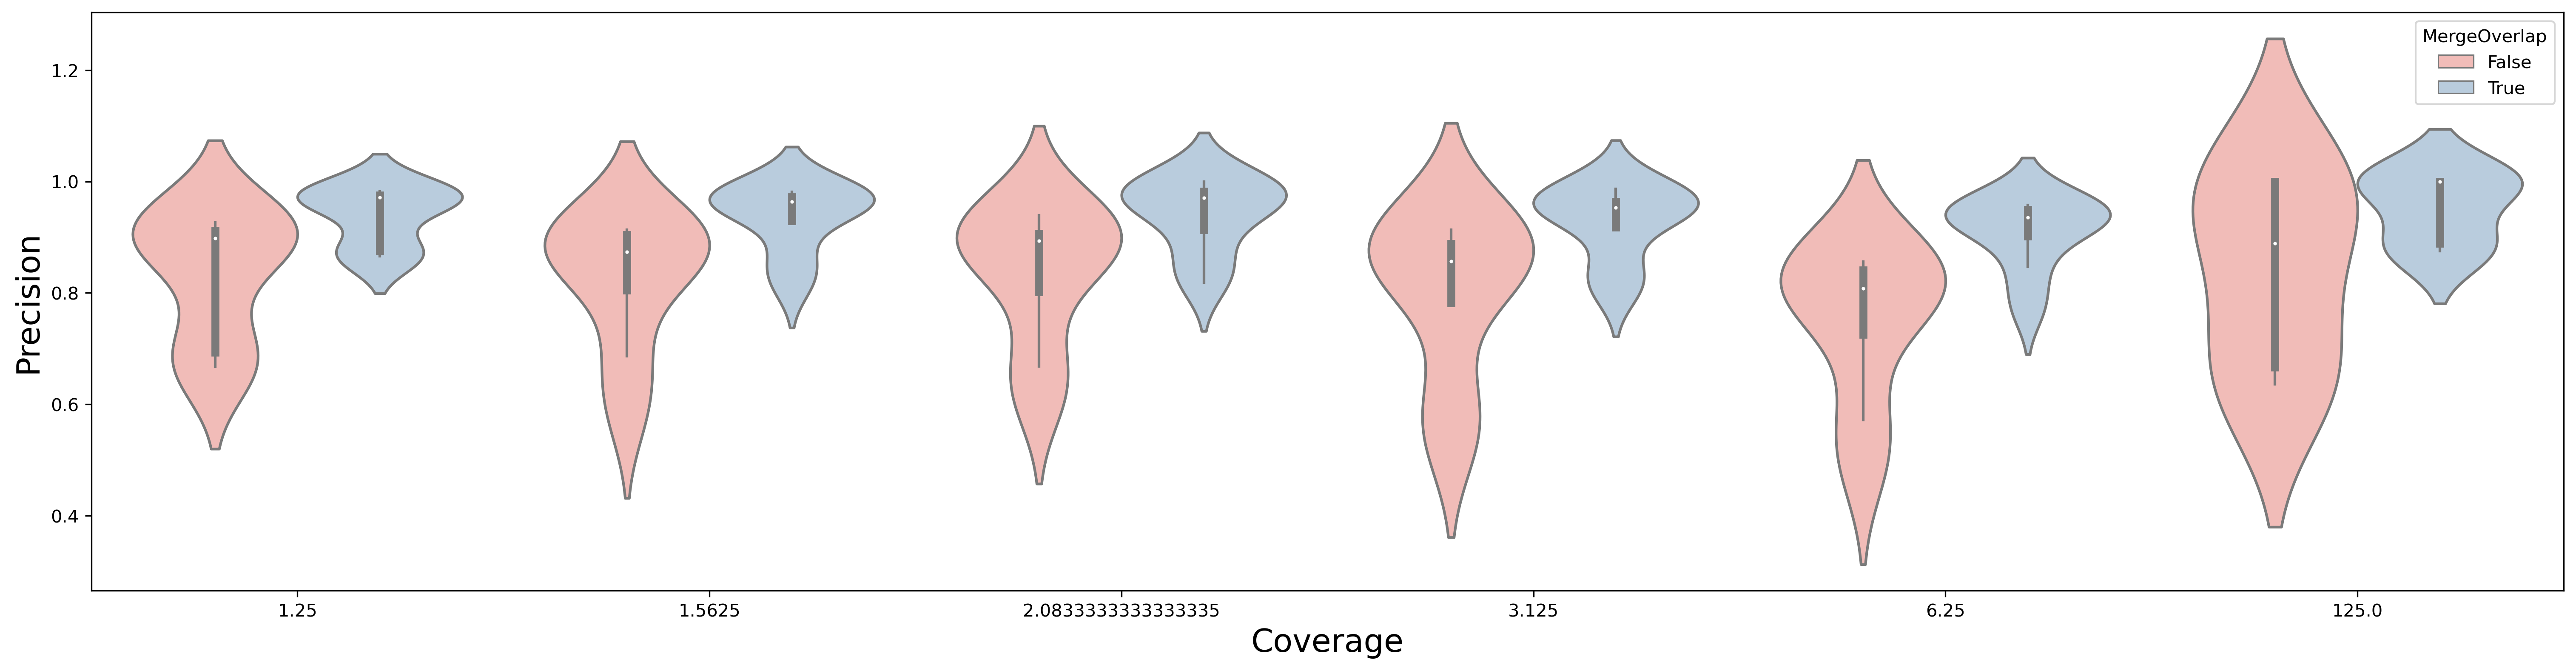

In [321]:
# Data selection
pd_data_num_genomes = pd_data_frame[pd_data_frame['major_test'] == 'num_genomes']
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['tool'] != 'Bracken']
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['tool'] != 'FastViromeExplorer']

# Plotting
plt.figure(figsize=(25, 6), dpi=300)
sns.violinplot(x="coverage", y="classification_precision", hue="MergeOverlap", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Coverage', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.show()

## 2.D - [Deprecated?] Number of reads (800)

/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


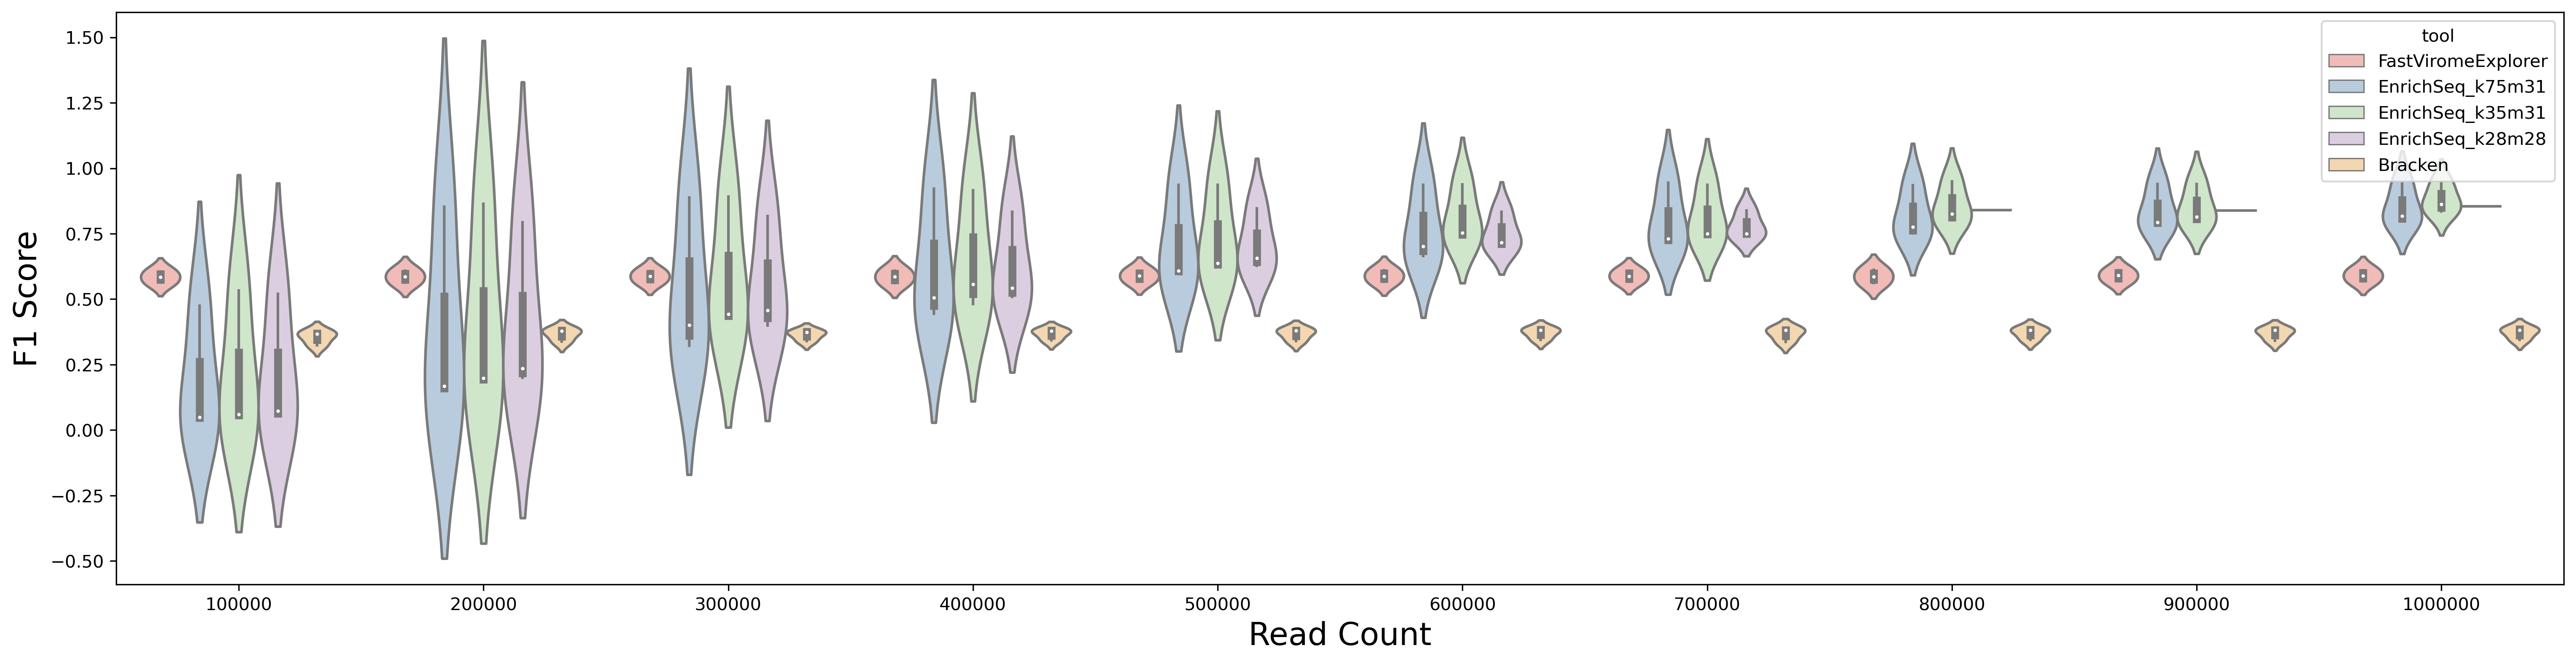

In [336]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
pd_data_num_genomes = pd_data_frame[pd_data_frame['major_test'] == 'num_reads_800genomes']
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['MergeOverlap'] == True]

# choose EnrichSeq version and plot
sns.violinplot(x="read_count", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

## 2.E - [Deprecated?] Number of reads (200)

/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


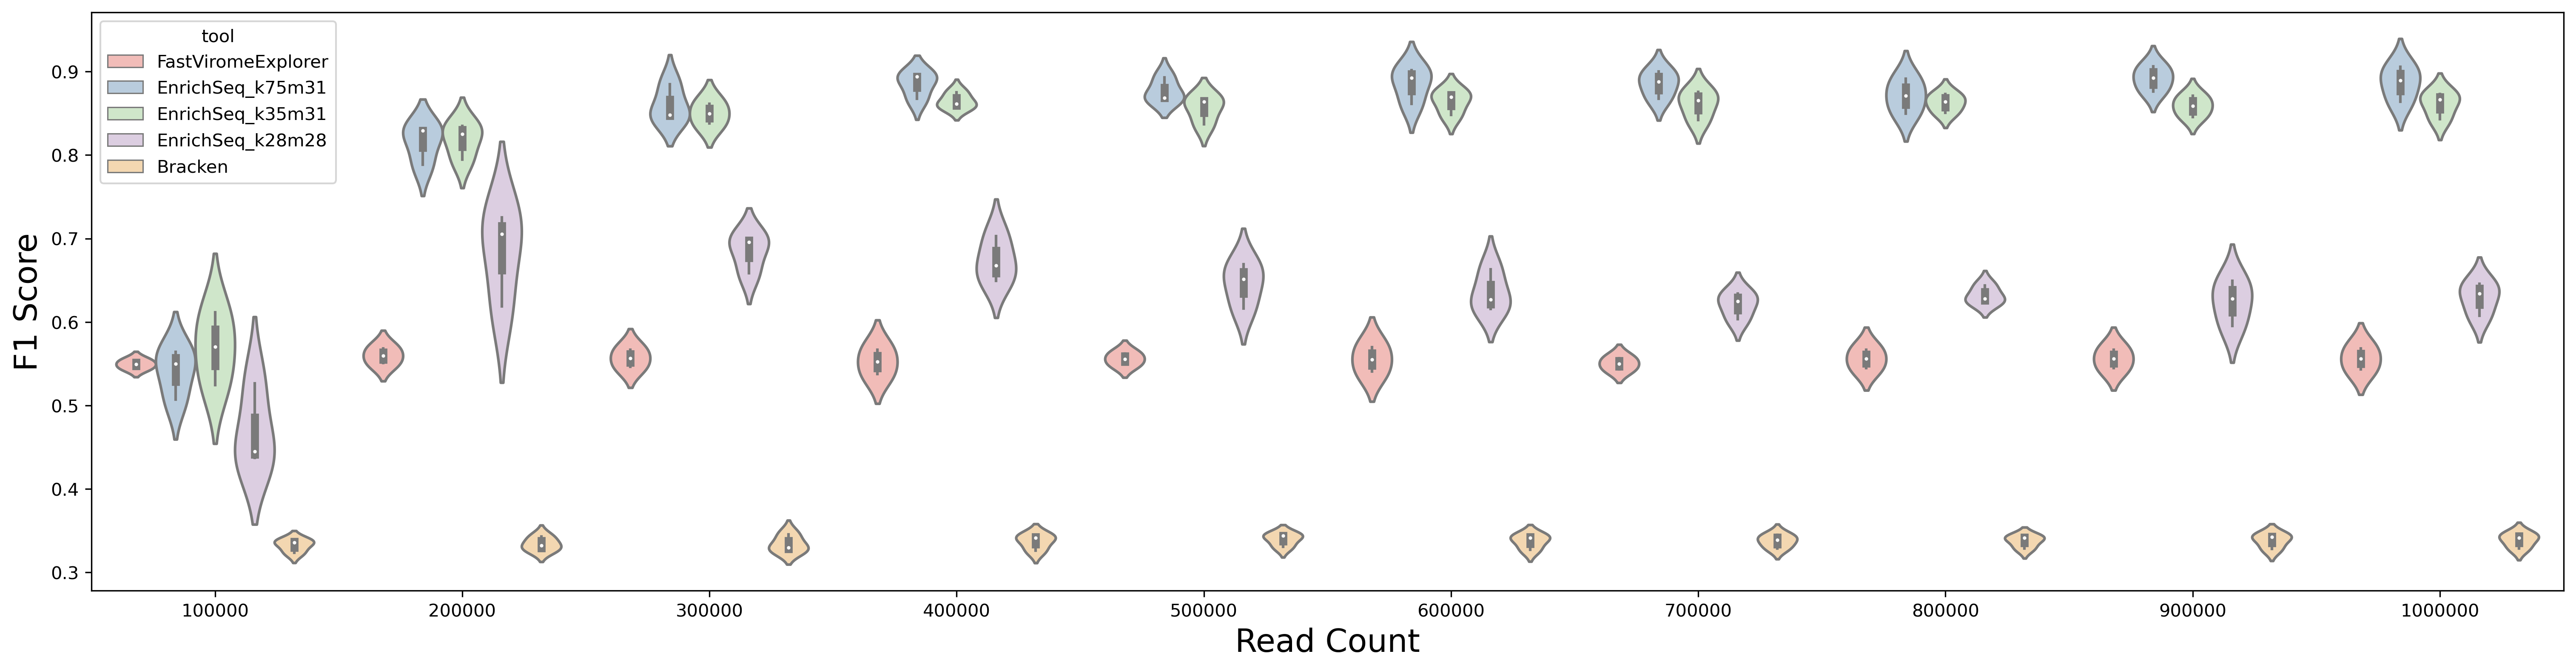

In [335]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
pd_data_num_genomes = pd_data_frame[pd_data_frame['major_test'] == 'num_reads_200genomes']
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['MergeOverlap'] == False]

# choose EnrichSeq version and plot
sns.violinplot(x="read_count", y="f1_score", hue="tool", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Read Count', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.show()

## L2 Distance

In [ ]:
# data selection
plt.figure(figsize=(25, 6), dpi=300)
pd_data_num_genomes = pd_data_frame
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['coverage'] < 10]
pd_data_num_genomes = pd_data_num_genomes[pd_data_frame['MergeOverlap'] == True] # toggle M.O.

# choose EnrichSeq version and plot
sns.violinplot(x="coverage", y="l2_abundance_distance", hue="tool", scale='width', width=0.8, scale_hue=False, data=pd_data_num_genomes, palette="Pastel1")
plt.xlabel('Coverage', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.show()

# 3. Making tables

## 3.A - making Kraken2/MergeOverlap table

In [222]:
"""
Making table for F1 with kraken and Merge Overlap
"""
# clean the table
pd_data_table = pd_data_frame[pd_data_frame['major_test'] == 'num_genomes']
pd_data_table = pd_data_table[pd_data_frame['tool'] != 'Bracken']
pd_data_table = pd_data_table[pd_data_table['tool'] != 'FastViromeExplorer']
pd_data_table = pd_data_table[pd_data_table['coverage'] != 125.0]
# pd_data_table = pd_data_table[pd_data_frame['MergeOverlap'] == False]


# groupby MO, subtest
# pd_data_table = pd_data_table[pd_data_table['tool'] == 'EnrichSeq_k28m28']
pd_data_table = pd_data_table.groupby(['tool', 'MergeOverlap']).mean()

# keep only precision and recall columns
pd_data_table = pd_data_table[['classification_precision','classification_recall', 'f1_score']]


# add precision fold change
# save table as CSV file
# path_for_csv = 'kracken_optimization_full.csv'
# pd_data_table.to_csv(path_for_csv)

# 
# pd_data_table = pd_data_table[pd_data_table['coverage'] <= 30]
# pd_data_table = pd_data_table[pd_data_table['coverage'] >= 2]

pd_data_table

/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


classification_precision  \
tool             MergeOverlap                             
EnrichSeq_k28m28 False                         0.619226   
                 True                          0.839983   
EnrichSeq_k35m31 False                         0.859172   
                 True                          0.954977   
EnrichSeq_k75m31 False                         0.897557   
                 True                          0.972474   

                               classification_recall  f1_score  
tool             MergeOverlap                                   
EnrichSeq_k28m28 False                      0.671887  0.625801  
                 True                       0.654733  0.720485  
EnrichSeq_k35m31 False                      0.701240  0.759531  
                 True                       0.650923  0.757095  
EnrichSeq_k75m31 False                      0.673813  0.755750  
                 True                       0.602812  0.723379

## 3.B - Overall table for all of the EnrichSeq parameter testing.

In [218]:
"""
Making table for precision increase with mege overlap
"""
# clean the table
pd_data_table = pd_data_frame[pd_data_frame['major_test'] == 'num_genomes']
pd_data_table = pd_data_table[pd_data_frame['tool'] != 'Bracken']
pd_data_table = pd_data_table[pd_data_table['tool'] != 'FastViromeExplorer']
# pd_data_table = pd_data_table[pd_data_table['coverage'] != 125.0]

# groupby MO, subtest
pd_data_table = pd_data_table[pd_data_table['tool'] == 'EnrichSeq_k35m31']
pd_data_table = pd_data_table.groupby(['coverage', 'MergeOverlap']).mean()

# keep only precision and recall columns
pd_data_table = pd_data_table[['classification_precision','classification_recall']]

# add precision fold change
# save table as CSV file
path_for_csv = 'OUT.csv'

pd_data_table.to_csv(path_for_csv)
pd_data_table

/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


classification_precision  classification_recall
coverage   MergeOverlap                                                 
1.250000   False                         0.896842               0.492316
           True                          0.966049               0.399100
1.562500   False                         0.870241               0.621924
           True                          0.960830               0.546412
2.083333   False                         0.877844               0.676305
           True                          0.960540               0.613466
3.125000   False                         0.853530               0.792320
           True                          0.952190               0.780637
6.250000   False                         0.797405               0.923333
           True                          0.935275               0.915000
125.000000 False                         1.000000               0.900000
           True                          1.000000               0.800000